# Chapter 4 Analysis of Variance
     

## 4.2 Two-way ANOVA

### 4.2.1 Motivating example and model

Consider the Hey Fever dataset. Nine compounds for Hay Fever Relief are made by varying levels of two basic ingredients. Ingredient 1 (denoted factor A) has $a = 3$ levels: low $(i = 1)$, medium $(i = 2)$ and high $(i = 3)$. And Ingredient 2 (factor B) has $b = 3$ levels: low $(j = 1)$,
medium $(j = 2)$ and high $(j = 3)$. A total of 36 subjects suffering from hay fever are selected and each of the 9 compounds are given to randomly selected $n = 4$ individuals.


The cell means model for a *balanced* two-way ANOVA takes the following form 
$$
Y_{ijk} = \mu_{ij} +\epsilon_{ijk}, \ k=1,\ldots, n, j=1,\ldots, b, i=1,\ldots, a,
$$
where $\{\epsilon_{ijk}\}$ are i.i.d. $N(0,\sigma^2)$. There are $ab$ unknown means and one unknown $\sigma$ in the cell means model. 

In practice, we often prefer the fhe factor effect form 
$$
Y_{ijk} = \mu_{\cdot\cdot} + \alpha_i+\beta_j + (\alpha\beta)_{ij}+\epsilon_{ijk}, \ k=1,\ldots, n, j=1,\ldots, b, i=1,\ldots, a,
$$
where $\{\epsilon_{ijk}\}$ are i.i.d. $N(0,\sigma^2)$. A quick count shows that there are $a$ $\alpha$s, $b$ $\beta$s, $ab$ interaction terms, one $\mu$ and one $\sigma$ in the factor effect form, which amount to $ab+a+b+2$ parameters. Indeed, the parameters in the factor effect form are no longer "free" as in the cell means model. A set of constraints are in placed is in place with the factor effect form, which will be discussed in Section 4.2.2. 


**Remark:** Note that $(\alpha\beta)_{ij}$ is a new parameter standing for the interaction effect, but **not** the product of $\alpha_i$ and $\beta_j$. We can replace it with $\gamma_{ij}$ to avoid confusion. However, the advantage of using  $(\alpha\beta)_{ij}$ is self-explanatory; that is the expression  $(\alpha\beta)_{ij}$ shows that it is an effect jointly controlled by factor A and factor B. 


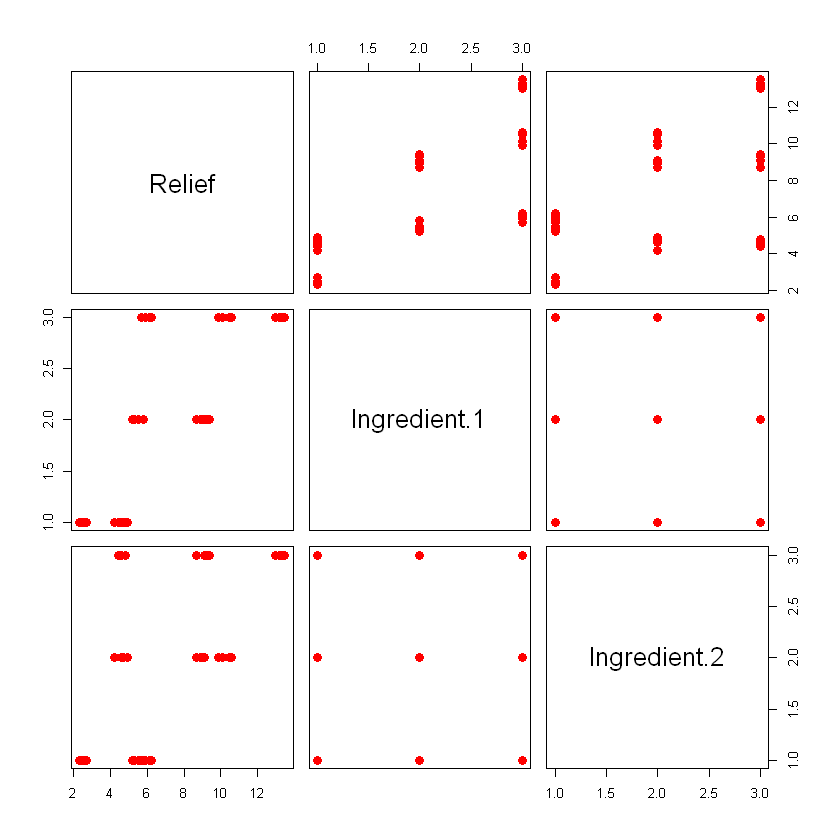

In [1]:
Hay <- read.csv(file="../Data/HayFever.csv", header=TRUE, sep=",")

# Use a slightly different visualization:
pairs(Hay,pch=16,col='red',cex=1.5)


### 4.2.2 Constraints on parameters

In the two-way model, the mapping between the cell means form and the factor effects form is slightly more complicated that that in the one-way case. We consider the balanced design here for simplicity. 

The cell means $\{\mu_{ij}: i =1,\ldots, a, j=1,\ldots, b\}$ are naturally defined as the population mean (or expectation) within each cell determined by one unique combination of two factors. We proceed to define the factor effects using the cell means. 

We first look at the over mean $\mu_{\cdot \cdot}$  
$$
\mu_{\cdot \cdot} =\sum_{i=1}^a \sum_{j=1}^ b \mu_{ij}/(ab), \ \mu_{i\cdot} = \sum_{j=1}^b \mu_{ij} /b, \ \mu_{\cdot j}=\sum_{i=1}^a \mu_{ij}/a.
$$
We can then define the factor effects as 
$$
\alpha_i=\mu_{i\cdot} - \mu_{\cdot \cdot},\ \beta_j=\mu_{\cdot j}-\mu_{\cdot\cdot},\ (\alpha\beta)_{ij} =\mu_{ij}-\mu_{i\cdot}-\mu_{\cdot j}+\mu_{\cdot\cdot}. 
$$
From these definitions, we can show that there are  natural constraints on these effects 
\begin{align}
\sum \alpha_i & = \sum \beta_j=0\\
\sum_{i=1}^a (\alpha\beta)_{ij} & =\sum_{j=1}^b (\alpha\beta)_{ij} =0
\end{align}

We can now write down the factor effects form with constraints 
$$
Y_{ijk} = \mu_{\cdot\cdot} + \alpha_i+\beta_j + (\alpha\beta)_{ij}+\epsilon_{ijk}, \ k=1,\ldots, n, j=1,\ldots, b, i=1,\ldots, a,
$$
where $\{\epsilon_{ijk}\}$ are i.i.d. $N(0,\sigma^2)$ and 
\begin{align}
\sum \alpha_i & = \sum \beta_j=0\\
\sum_{i=1}^a (\alpha\beta)_{ij} & =\sum_{j=1}^b (\alpha\beta)_{ij} =0
\end{align}

Very often you may see an additive model $Y_{ijk} = \mu_{\cdot\cdot} + \alpha_i+\beta_j + \epsilon_{ijk}$, where the interactions $\{(\alpha\beta)_{ij}\}$ are dropped. Dropping the interaction terms reduces the number of unknown parameters to estimate, which improves efficiency if the reduced model does not fall too far away from the truth. However, a reduced model places additional assumptions which may not be true in the real world. In practice, we need to carefully decide the form of model based on, but not limited to, background, questions of interest, prior knowledge, exploratory analysis, etc. 


### 4.2.3 Estimation

We can estimate the cell means as before 
$\hat{\mu}_{ij}=\bar{Y}_{ij\cdot}, \hat{\mu}_{\cdot\cdot}=\bar{Y}_{\cdot\cdot\cdot}, \hat{\mu}_{i\cdot} =\bar{Y}_{i\cdot\cdot}, \hat{\mu}_{\cdot j}=\bar{Y}_{\cdot j \cdot}$. 
Noting that the effects are linear combinations of cell means, we can estimate them using the equalities in Section 4.2.2
$$
\hat{\alpha}_i = \bar{Y}_{i\cdot \cdot}-\bar{Y}_{\cdot \cdot \cdot}, \hat{\beta}_{j}=\bar{Y}_{\cdot j \cdot} -\bar{Y}_{\cdot \cdot \cdot}, (\hat{\alpha\beta})_{ij}=\bar{Y}_{ij}-(\bar{Y}_{\cdot\cdot\cdot} +\hat{\alpha}_i+\hat{\beta}_j).
$$
As a result, the same set of constraints still hold on the estimators. 


For each $Y_{ijk}$, the fitted value is $\bar{Y}_{ij\cdot}$. The residual is thus $e_{ijk} \equiv Y_{ijk}-\bar{Y}_{ij\cdot}$. We can show that the fitted value is independent with the residual. Just like in one-way ANOVA, this independence is the backbone for testing. 

The sum of squares are as follow.  

**Residual sum of squares.**
$$
{\rm SSE} = \sum \sum \sum e_{ijk}^2 = \sum\sum\sum \big(Y_{ijk}-\bar{Y}_{ij\cdot}\big)^2, df({\rm SSE})=n_T -ab =(n-1)ab.
$$
As before, we can define the mean squared errors as ${\rm MSE} ={ {\rm SSE}}/{ df({\rm SSE})}$, where we know that $\mathbb{E}[{\rm MSE}]=\sigma^2$. 

**Total sum of squares.**
$$
{\rm SSTO} = \sum \sum \sum \big(Y_{ijk}-\bar{Y}_{\cdot \cdot \cdot}\big)^2, \ df({\rm SSTO})=n_T -1 = nab-1.
$$

**Sum of squares due to the main effect of factor A.** 
$$
{\rm SSA} = \sum \sum \sum \hat{\alpha}_i^2 = nb\sum_{i=1}^a \hat{\alpha}_i^2, \ df({\rm SSA})=a-1.
$$

**Sum of squares due to the main effect of factor B.** 
$$
{\rm SSB} = \sum \sum \sum \hat{\beta}_j^2 = na\sum_{j=1}^a \hat{\beta}_j^2, \ df({\rm SSB})=b-1.
$$

**Sum of squares due to the interaction effects.**
$$
{\rm SSAB} = \sum \sum \sum \hat{\alpha\beta}_{ij}^2 = n \sum \sum \hat{\alpha\beta}_{ij}^2, \ df({\rm SSAB})=(a-1)(b-1).
$$

We have the following equalities
$$
{\rm SSTO}={\rm SSA}+{\rm SSB} + {\rm SSAB}+{\rm SSE} \ {\rm and} \ df({\rm SSTO})=df({\rm SSA})+df({\rm SSB})+df({\rm SSAB}).
$$

For the mean squares, when $\epsilon$s are i.i.d. $N(0,\sigma^2)$, we have $\hat{Y}_{ijk} \perp e_{ijk}$, which yields ${\rm MSE} \perp {\rm MSA}, {\rm MSB}, {\rm MSAB}$. 


**Properties**
1. $\mathbb{E}[{\rm MSE}]=\sigma^2$; 
2. $\mathbb{E}[{\rm MSA}]=\sigma^2 + nb \sum \alpha_i^2 /(a-1)$; 
3. $\mathbb{E}[{\rm MSB}]=\sigma^2 +na \sum \beta_i^2 /(b-1)$; 
4. $\mathbb{E}[{\rm MSAB}]=\sigma^2 + n \sum\sum ({\alpha\beta})_{ij}^2/(a-1)(b-1)$. 

### 4.2.4 Inference 

Tests for two-way ANOVA models are essentially identical to those for one-way ANOVA model. We discuss only the F-tests for the interactions and one main effect here. 

**F-test for interactions.** Consider the following null and alternative hypotheses. 
$$
H_0: (\alpha\beta)_{ij}=0 \  \forall i, j  \ \ {\rm v.s.} \ \ \ H_1:\  {\rm not \ all \ } (\alpha\beta)_{ij} \ {\rm are \ zero}.
$$
The F-statistics is $F^*={\rm MSAB}/{\rm MSE}$. Under the null, $F^*$ follows an $F$-distribution with $df=( (a-1)(b-1),(n-1)ab)$. 

**Test for the main effect of factor A.** Consider the following null and alternative hypotheses. 
$$
H_0: \alpha_{i}=0 \ \ \forall i \ \ \  {\rm v.s.}\ \  \ H_1:\  {\rm not \ all \ } \alpha_i \ {\rm are \ zero}.
$$
We have $F^*={\rm MSA}/{\rm MSE}$ that follows an F-distribution with $df=(a-1,(n-1)ab)$. 


Similar results hold for factor B. Theory and justifications for these tests are almost identical to those for one-way ANOVA. 

**MSE without interactions.** In the absence of interactions, the MSE defined in the previous section no long makes sense. Instead, we can define $\hat{Y}_{ijk}=\hat{\mu}_{\cdot\cdot} +\hat{\alpha}_i + \hat{\beta}_j$. This  leads to $e_{ijk}'=Y_{ijk}-\hat{Y}_{ijk}$.  Consequently, ${\rm SSE}= \sum \sum \sum \big(Y_{ijk}-\hat{Y}_{ijk}\big)^2$ and $df({\rm SSE})=nab-a-b+1$. Finally, we have that ${\rm MSE} = {\rm SSE} /(nab-a-b+1)$. 

Methods for testing linear combinations and simultaneous inference generalize to the case with two-way, and higher order, ANOVA model. 



### 4.2.5 Special case: one observation per case

When there is only one observation per cell, the number of observations ($ab$) equals to the number of unknown means $(ab)$. It is not possible to estimate the full model with interactions with proper measures of uncertainty. However, the number of observed cases does not alter the truth underneath the data. We may still want to test whether interactions are present. 

**Tukey's test for additivity.**
Consider the following model
$$
Y_{ij}=\mu_{\cdot\cdot} +\alpha_i+\beta_j+D \alpha_i\beta_j+\epsilon_{ij}, 
$$
where $\epsilon_{ij}$ are i.i.d. $N(0,\sigma^2)$. In this model, the fourth term on the right-hand side attempts to capture the interaction effects with limited capacity. The specific form $D \alpha_i\beta_j$ does not capture all possible interactions, but it is a work-around with limited observations. In this model, we can test 
$$
H_0: D=0 \ \ \ {\rm v.s.}\ \ \ H_a: D \neq 0.
$$

We can derive that 
$$
\hat{D} = \frac{\sum\sum Y_{ij} \hat{\alpha}_i \hat{\beta}_j}{\sum \hat{\alpha}_i^2 \sum \hat{\beta}_j^2 }. 
$$
We can construct the F-test for $H_0: D=0$ in a similar manner as in Section 4.2.4. You can read more about this test in, e.g., [here](https://en.wikipedia.org/wiki/Tukey's_test_of_additivity). 






### 4.2.6 Unbalanced two-way ANOVA 

A two-way ANOVA when the numbers of observations vary across cells takes the following form 
$$
Y_{ijk} =  \mu_{ijk}+\epsilon_{ijk}= \mu_{\cdot\cdot} + \alpha_i+\beta_j + (\alpha\beta)_{ij}+\epsilon_{ijk}, \ k=1,\ldots, n_{ij}, j=1, \ldots, b, i=1,\ldots, a,
$$
where $\{\epsilon_{ijk}\}$ are i.i.d. $N(0,\sigma^2)$. The same constraints hold on the parameters. 

The factor effects are still defined as follows 
$$
\mu_{\cdot \cdot} =\sum_{i=1}^a \sum_{j=1}^ b \mu_{ij}/(ab), \ \mu_{i\cdot} = \sum_{j=1}^b \mu_{ij} /b, \ \mu_{\cdot j}=\sum_{i=1}^a \mu_{ij}/a.
$$
And furthermore,  we have 
$$
\alpha_i=\mu_{i\cdot} - \mu_{\cdot \cdot},\ \beta_j=\mu_{\cdot j}-\mu_{\cdot\cdot},\ (\alpha\beta)_{ij} =\mu_{ij}-\mu_{i\cdot}-\mu_{\cdot j}+\mu_{\cdot\cdot}. 
$$
Estimators follow the same form by plugging the sample means in the equations above.

However, it is **no longer true** that 
$$
\hat{\mu}_{\cdot\cdot} =\bar{Y}_{\cdot\cdot\cdot}, \ \hat{\mu}_{i\cdot} = \bar{Y}_{i\cdot\cdot}, \ \hat{\mu}_{\cdot j}=\bar{Y}_{\cdot j \cdot},  \ {\rm SSTO}={\rm SSA}+{\rm SSB} + {\rm SSAB}+{\rm SSE}.
$$
To see this, we just need to expand $\bar{Y}_{\cdot\cdot\cdot}$ as weighted average of the sample cell means. 


Suppose that we are interested in testing the presence of interactions. 
$$
H_0: (\alpha\beta)_{ij}=0 \ {\rm v.s.} \ H_1: {\rm not \ all \ } (\alpha\beta)_{ij} \ {\rm are \ zero}.
$$
We now need to use the following framework for testing. 
* Full model: $Y_{ijk} =\mu_{\cdot\cdot} + \alpha_i+\beta_j + (\alpha\beta)_{ij}+\epsilon_{ijk}$
* Reduced model: $Y_{ijk} =\mu_{\cdot\cdot} + \alpha_i+\beta_j +\epsilon_{ijk}$

The F-statistic is then 
$$
F^*=\frac{ [{\rm SSE}_{\rm red}-{\rm SSE}_{\rm full}  ] / [ df_{\rm red}-df_{\rm full}   ]  }{ {\rm SSE}_{\rm full}/df_{\rm full}},
$$
where $F^* \sim F( (a-1)(b-1), n_T-ab)$ under the null hypothesis. 


### 4.2.7 Example: Hay Fever data

Let's return to the Hay Fever data. If an analysis plan has been determined, as is usually the case for randomized control trials, we need to strictly follow the analysis plan. The pre-determined analysis plan makes sure that there won't be data mining attempts that inflates the type I errors.  

In this example, we will pretend that we have no such plans. Our task is to explore and investigate the effectiveness of the two ingradients. We still, however, need to be mindful with type I errors from our inference. Think about the type I error as what determines the *weight* your results carry: the larger the type I error is, the more negligible your statistical inference is. 

There are two factors with a total of 9 combinations in this data with 36 samples. It is natural to consider a two-way ANOVA model here. Among the many assumptions for an ANOVA model, the major assumption that we want to check before our analysis is whether the interactions exist or not. We shall still examine the rest of the assumptions (normaility, equal variance, etc.) in the model diagnostics or sensitivity analysis. The analysis stategy is shown in the following cells. 


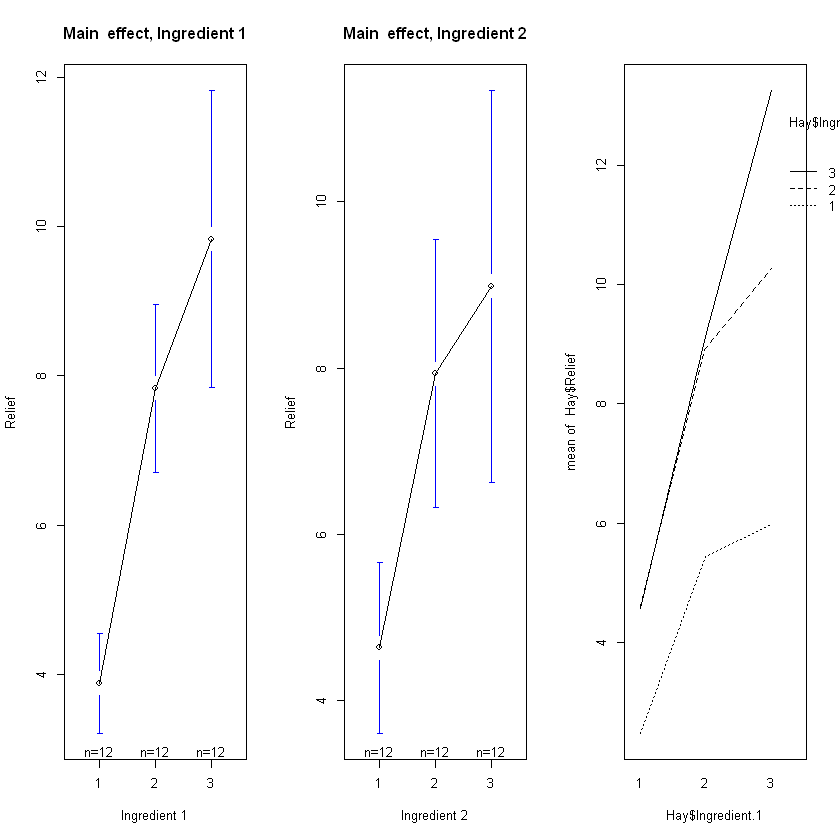

In [7]:
# Exploratory analysis
Hay <- read.csv(file="../Data/HayFever.csv", header=TRUE, sep=",")
library(gplots)
par(mfrow=c(1,3))
# Main effect plot for ingredient 1
plotmeans(Relief~Ingredient.1,data=Hay,xlab="Ingredient 1",ylab="Relief", main="Main  effect, Ingredient 1") 
# Main effect plot for ingredient 2
plotmeans(Relief~Ingredient.2,data=Hay,xlab="Ingredient 2",ylab="Relief", main="Main  effect, Ingredient 2") 
#Interaction plot
interaction.plot(Hay$Ingredient.1, Hay$Ingredient.2, Hay$Relief)
par(mfrow=c(1,1))

In [ ]:
# Test for interactions 
full_model=lm(Relief~as.factor(Ingredient.1)+as.factor(Ingredient.2)+as.factor(Ingredient.1)*as.factor(Ingredient.2),data=Hay);
reduced_model=lm(Relief~as.factor(Ingredient.1)+as.factor(Ingredient.2),data=Hay);
anova(reduced_model,full_model)

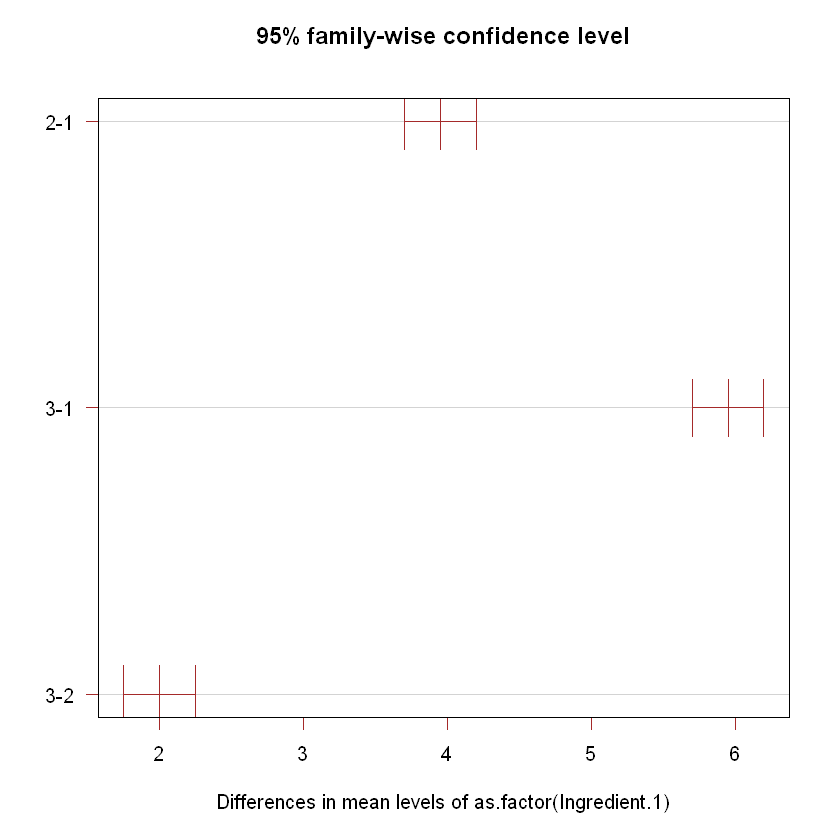

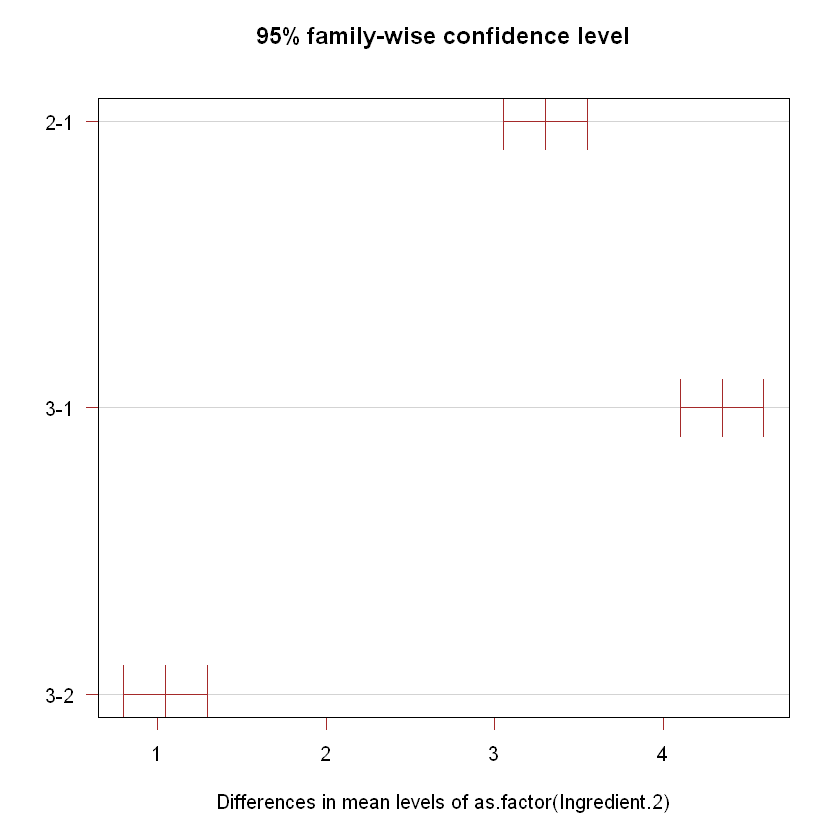

,1,2,3
1,2.475,4.600,4.575
2,5.450,8.925,9.125
3,5.975,10.275,13.250


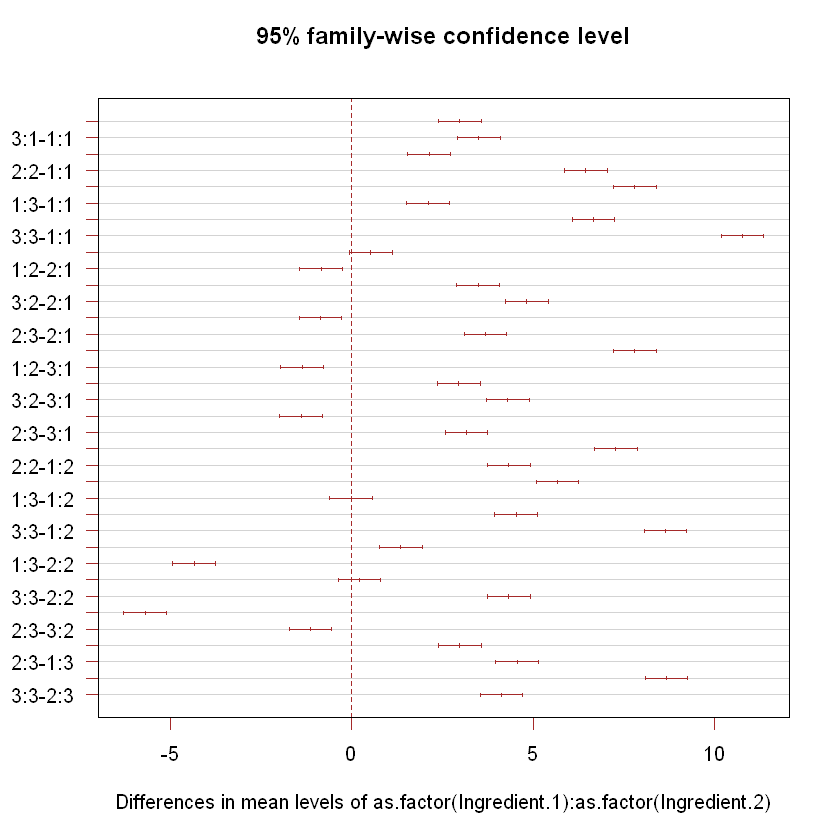

In [8]:
# Fit the chosen model:
library(stats)
alpha=0.05;
anova.fit<-aov(Relief~as.factor(Ingredient.1)+as.factor(Ingredient.2)+as.factor(Ingredient.1)*as.factor(Ingredient.2),data=Hay)



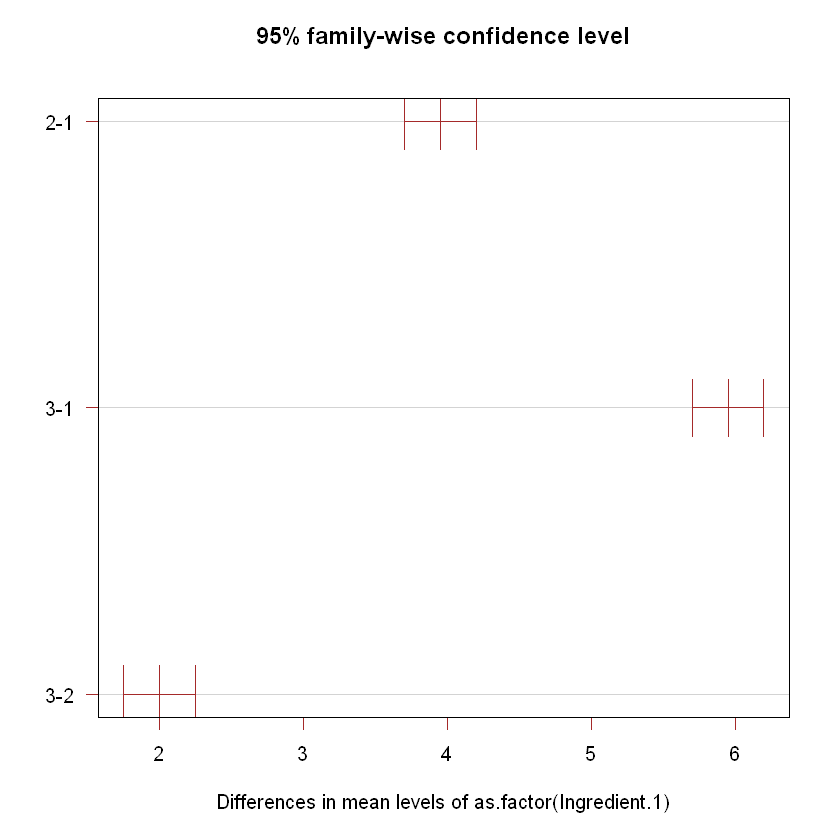

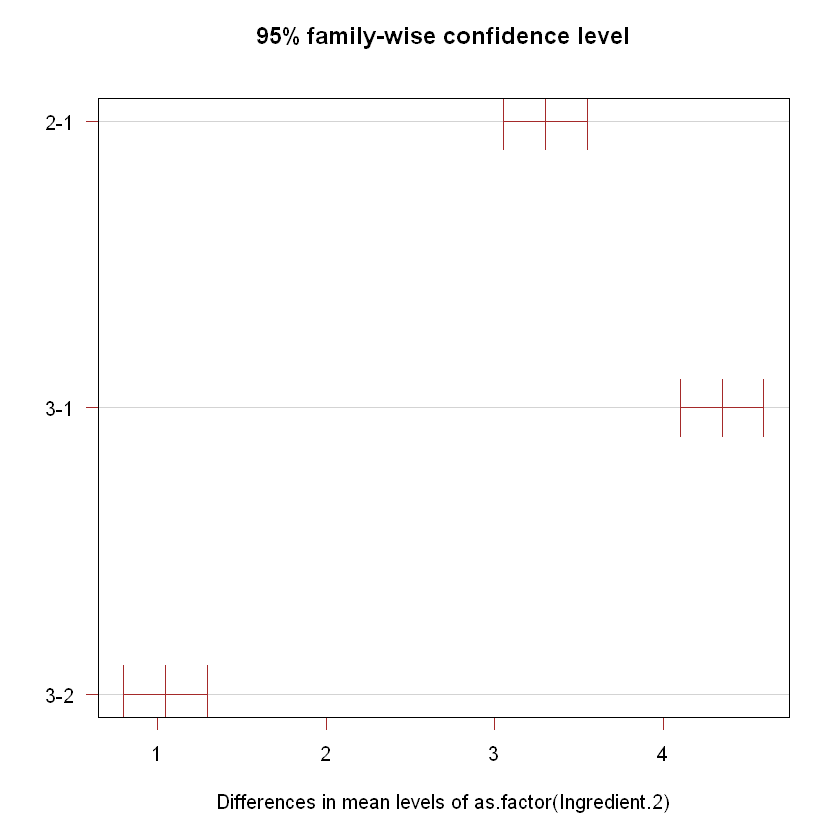

,1,2,3
1,2.475,4.600,4.575
2,5.450,8.925,9.125
3,5.975,10.275,13.250


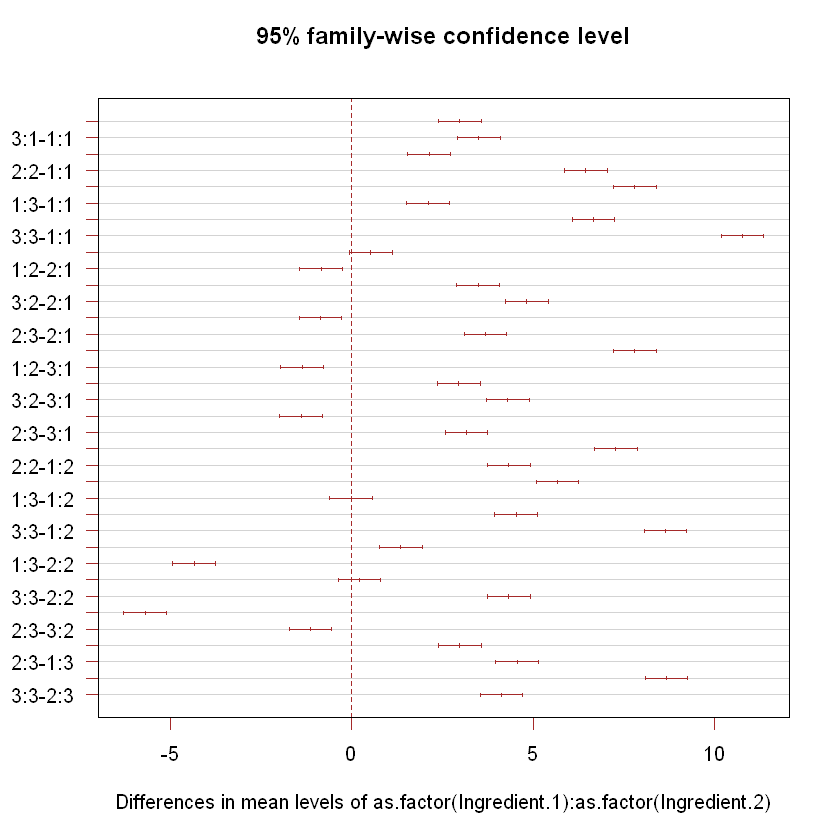

In [9]:
# Find the best combination
T.ci=TukeyHSD(anova.fit,conf.level = 1-alpha)
plot(T.ci, las=1 , col="brown")

# We only need to pay attention to the differences of the two largest means
idx=list();
idx[[1]]=Hay$Ingredient.1;idx[[2]]=Hay$Ingredient.2;
(means.comb=tapply( Hay$Relief, INDEX=idx,mean))

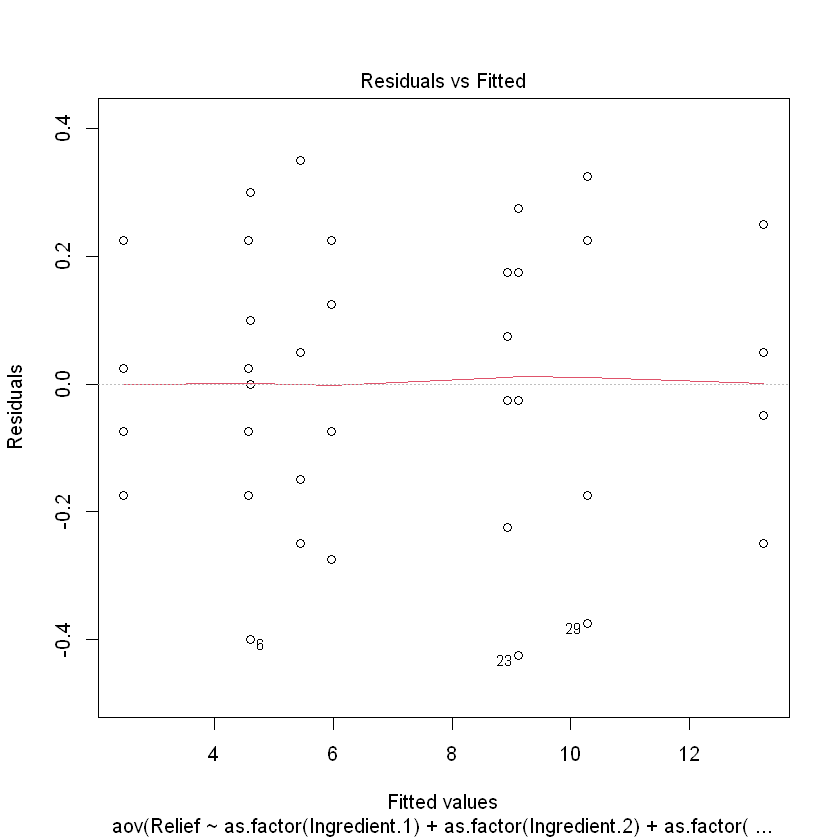

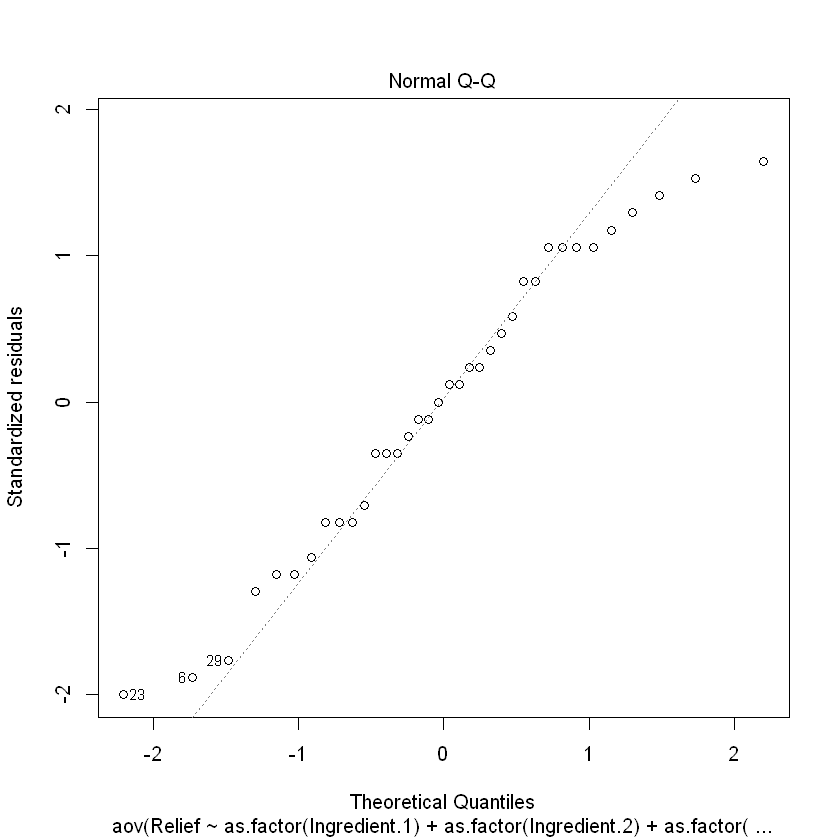

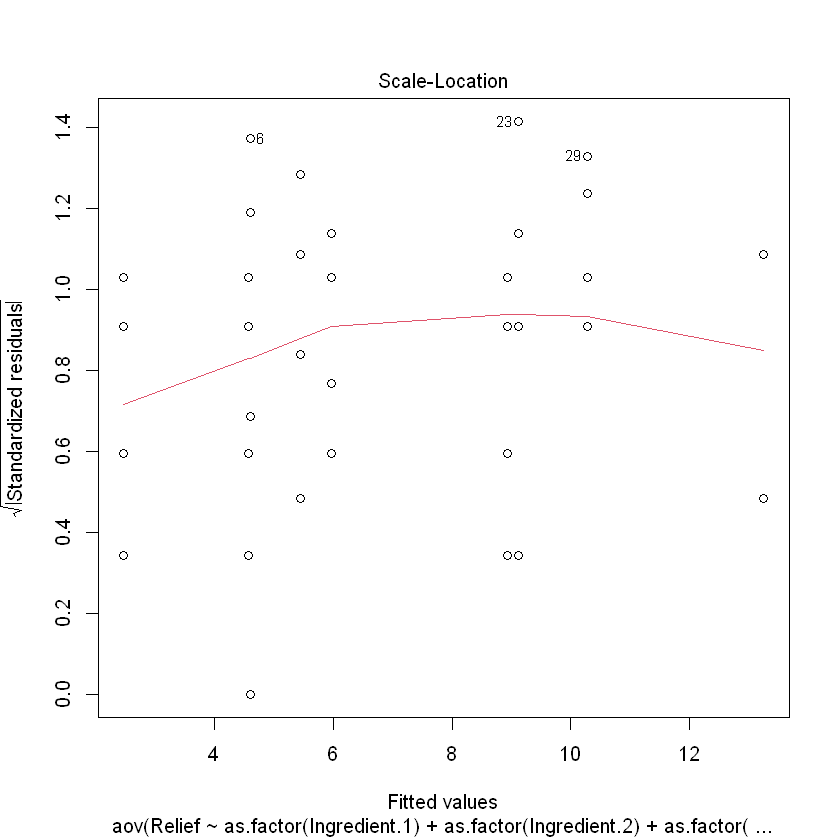

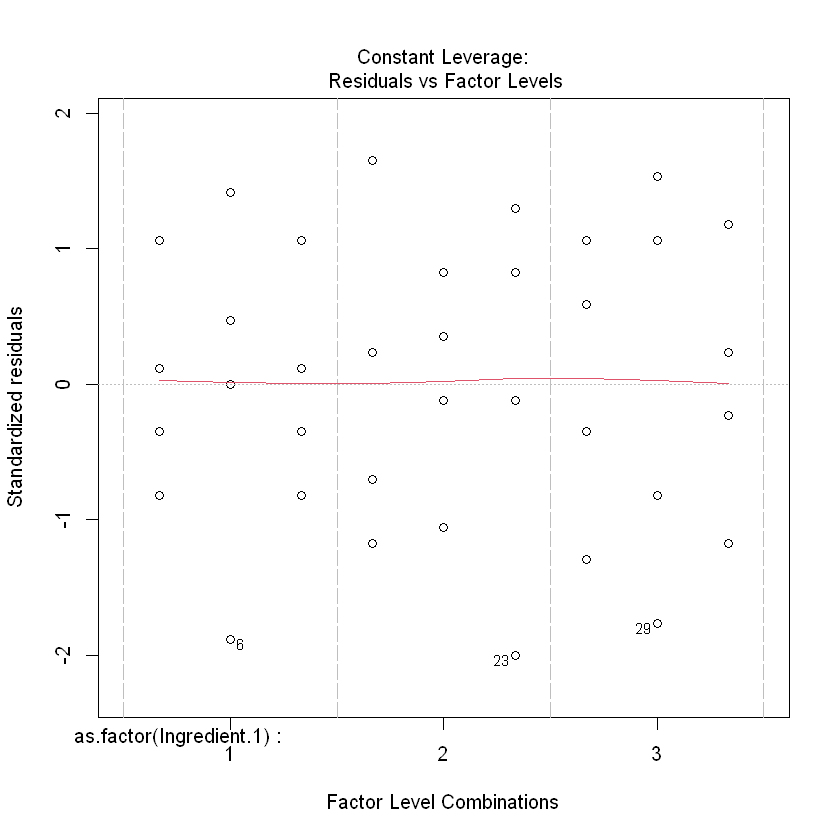

In [11]:
# Diagnostics
plot(anova.fit)
# Conduct formal tests
# or fit alternative models 